# Decision Tree

- 회귀 및 분석 트리를 우리는 CART(Classification And Regression Tree)라고 부르는데 두가지 종류의 트리가 있다.

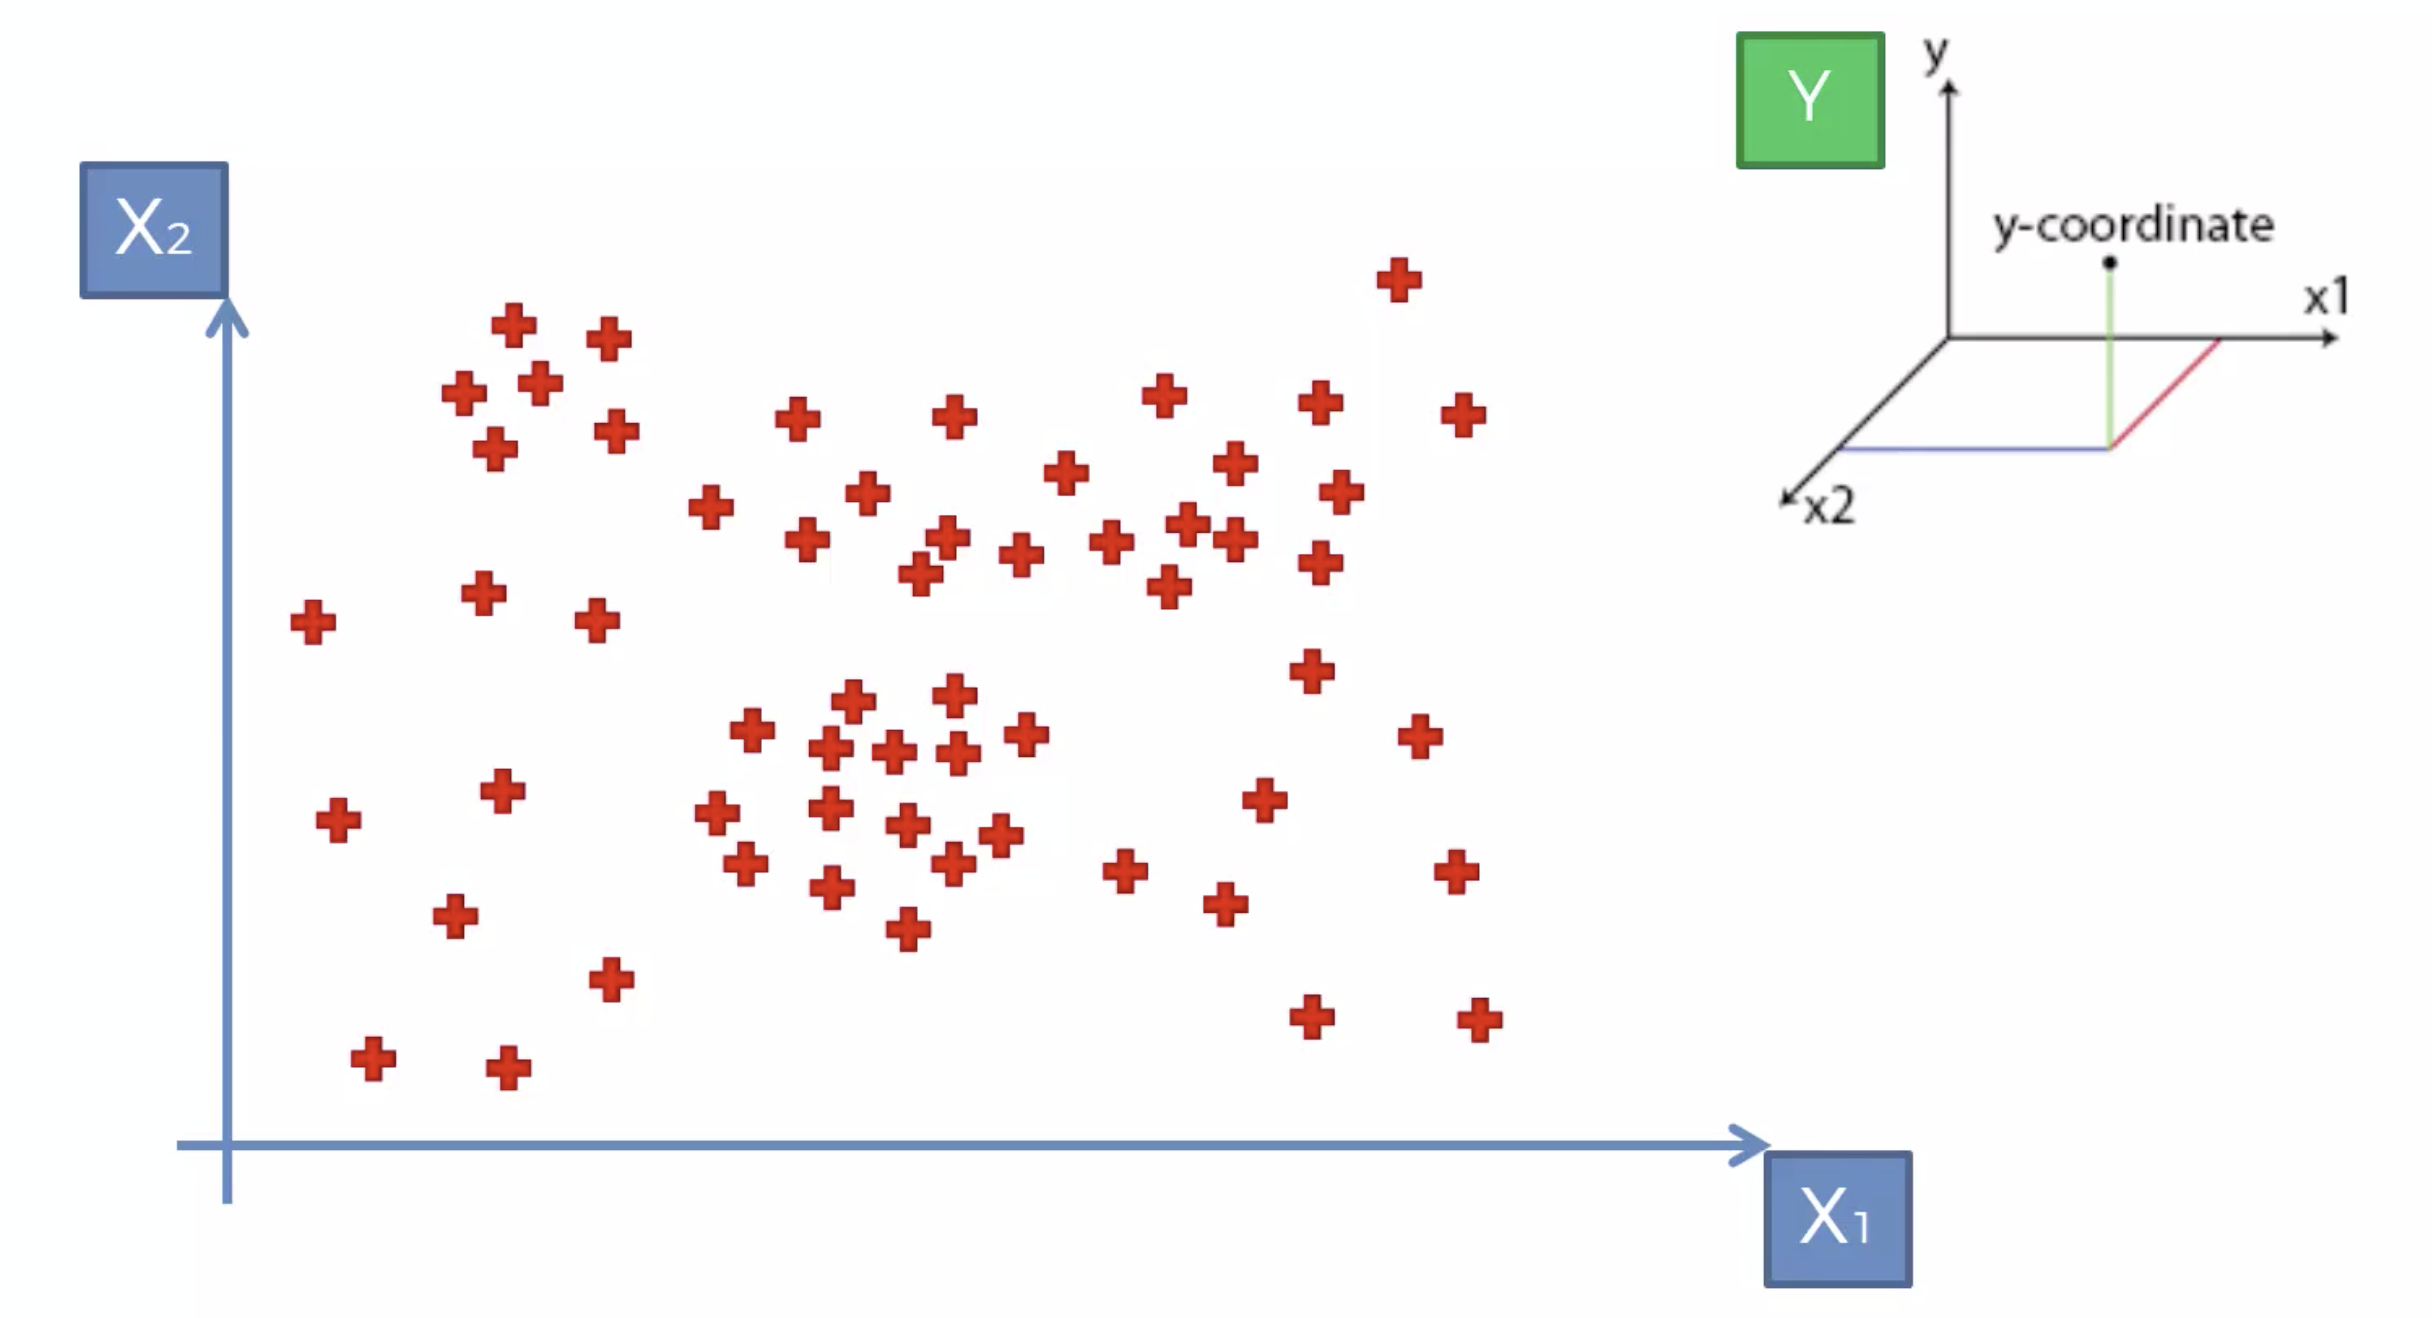

- 위와 같은 데이터셋이 있을때, Decision Tree 알고리즘이 실행되며 데이터들을 Split한다.
- Split하는 기준은?

#### Decision Tree Algorithm (Classification)
- Decision Tree를 만들기 위해 실행되는 알고리즘이고 여기에 쓰이는 Metric이 Information Gain이다.
- Information Gain은 Feature가 특정 Class에 대해 얼마만큼의 정보를 주는지를 측정하는 것.
- Information Gain = Entropy(Parent) - Weight Average * Entropy(Child)
- Decision Tree Algorithm은 모든 Feature에 대해 이 IG를 최대화 시킨다.
- 그리고 가장 높은 IG를 가지게 되는 특정 Feature에 대해 테스트하고 Split을 하게된다.
##### Splitting Criteria라고도 부르며 IG는 이중 전통적인 방법에 해당하고, 이 외에도 Cross-Entropy, Gini Impurity, MSE 등이 존재한다.

#### Entropy란?
- 특정 예제군에서 나타나는 불확실성의 정도
- 자세한 IG의 구조는 칠판을 통해 설명

### Decision Tree Regression

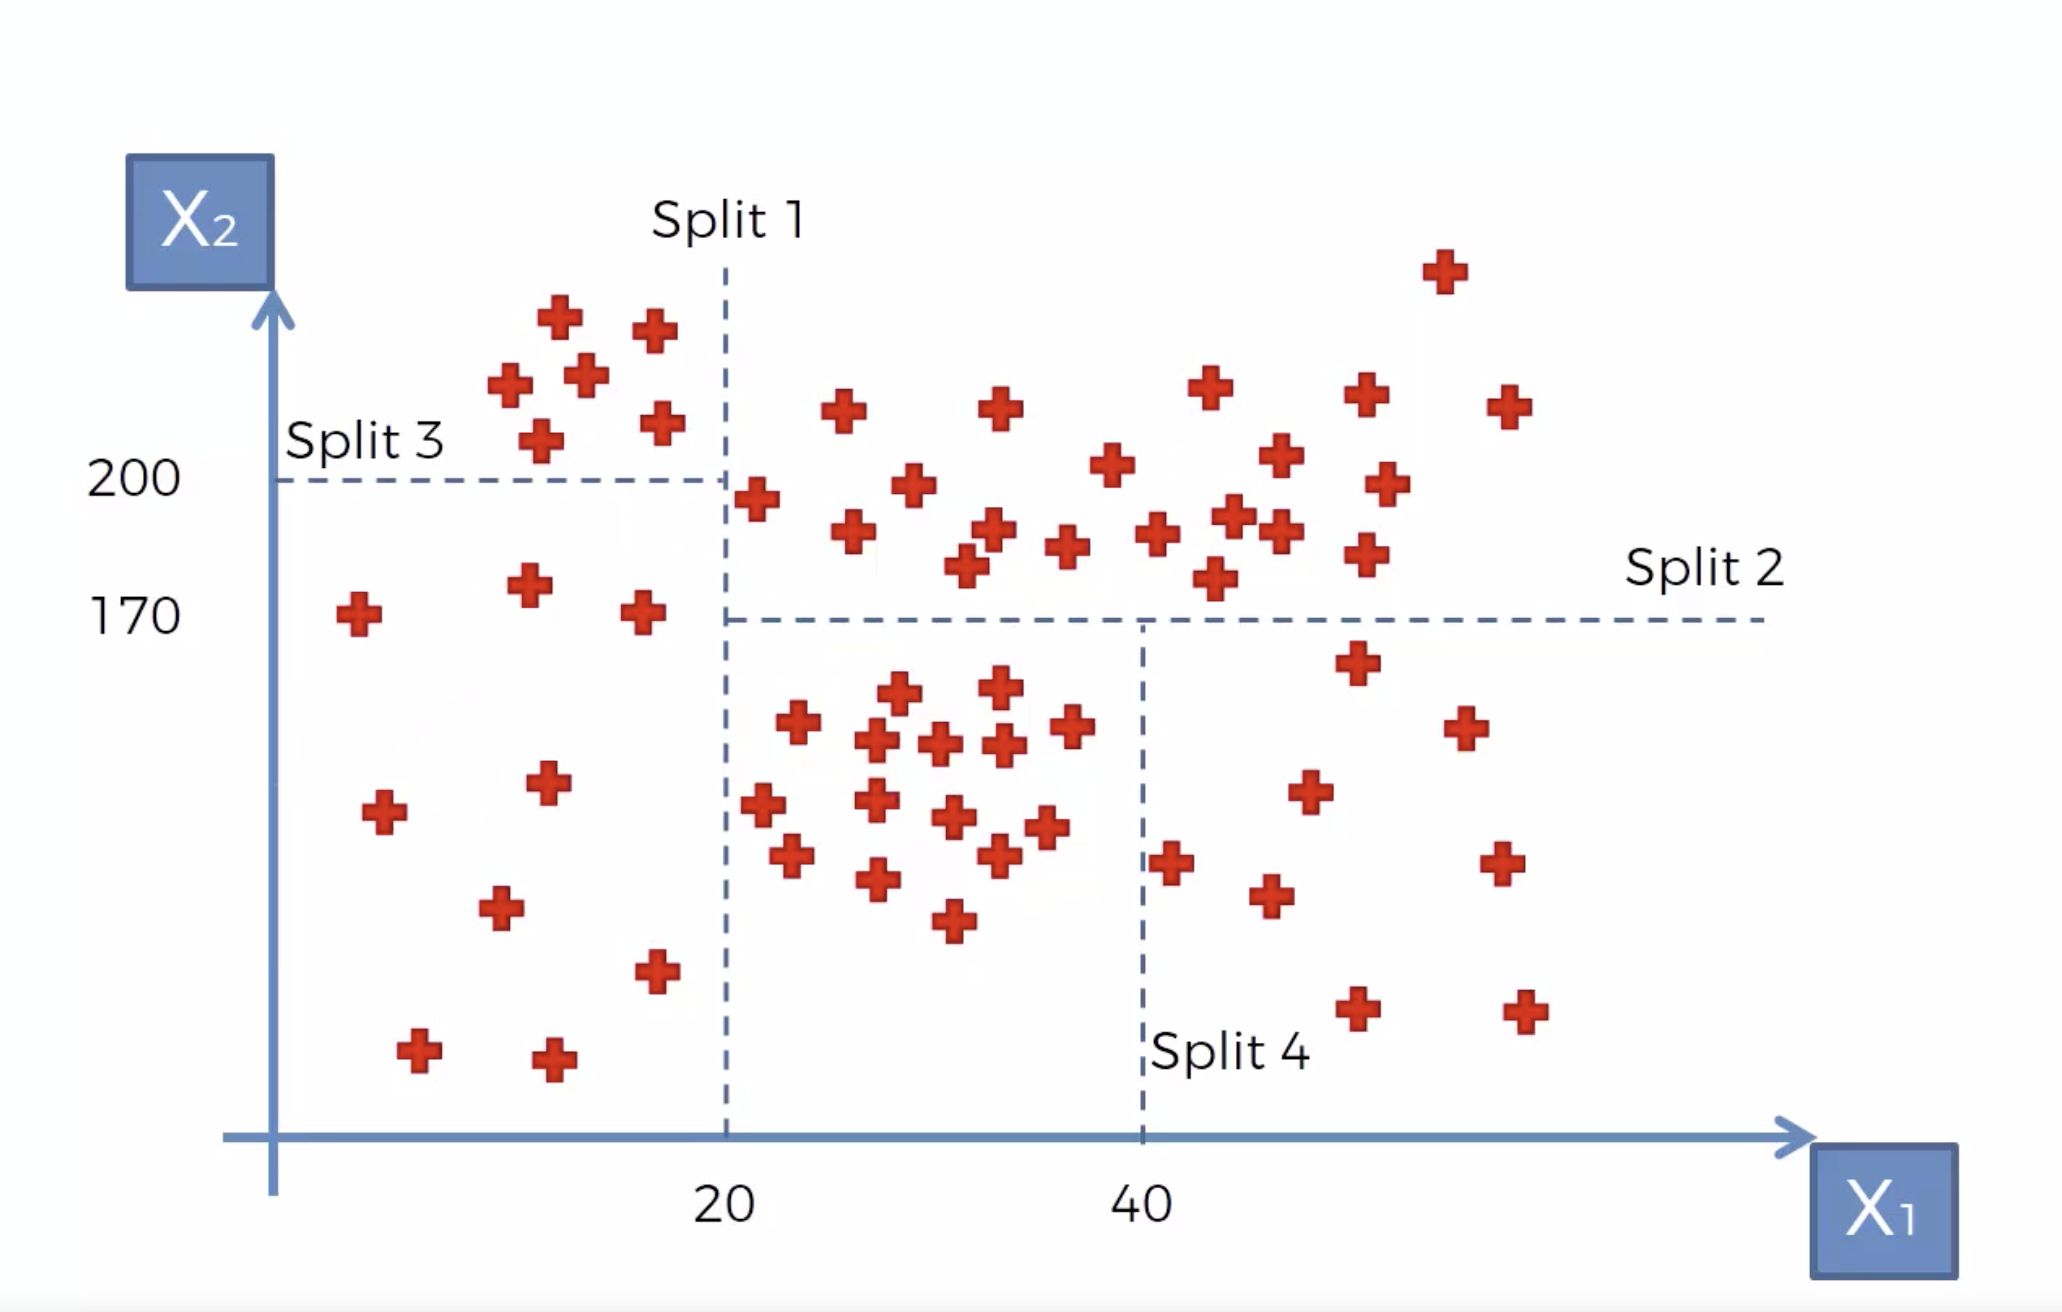
- Continuous한 Target을 가지고 있는 Regression 특성 상, 다른 Split Metrics를 사용하여야 하는데, MSE를 사용할 것이다. (Variance Reduction)
- MSE 알고리즘은 True y 와 Predicted y의 평균오차가 가장 적은 기준의 split을 선정하게된다.
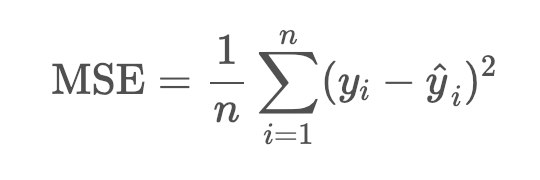
- 각각의 구역이 하나의 Leaf이고, 해당 Leaf의 observation 들의 y값을 평균내어 대표값으로 선정하고, unobserved 데이터가 추가되었을때 예측값으로 사용된다.

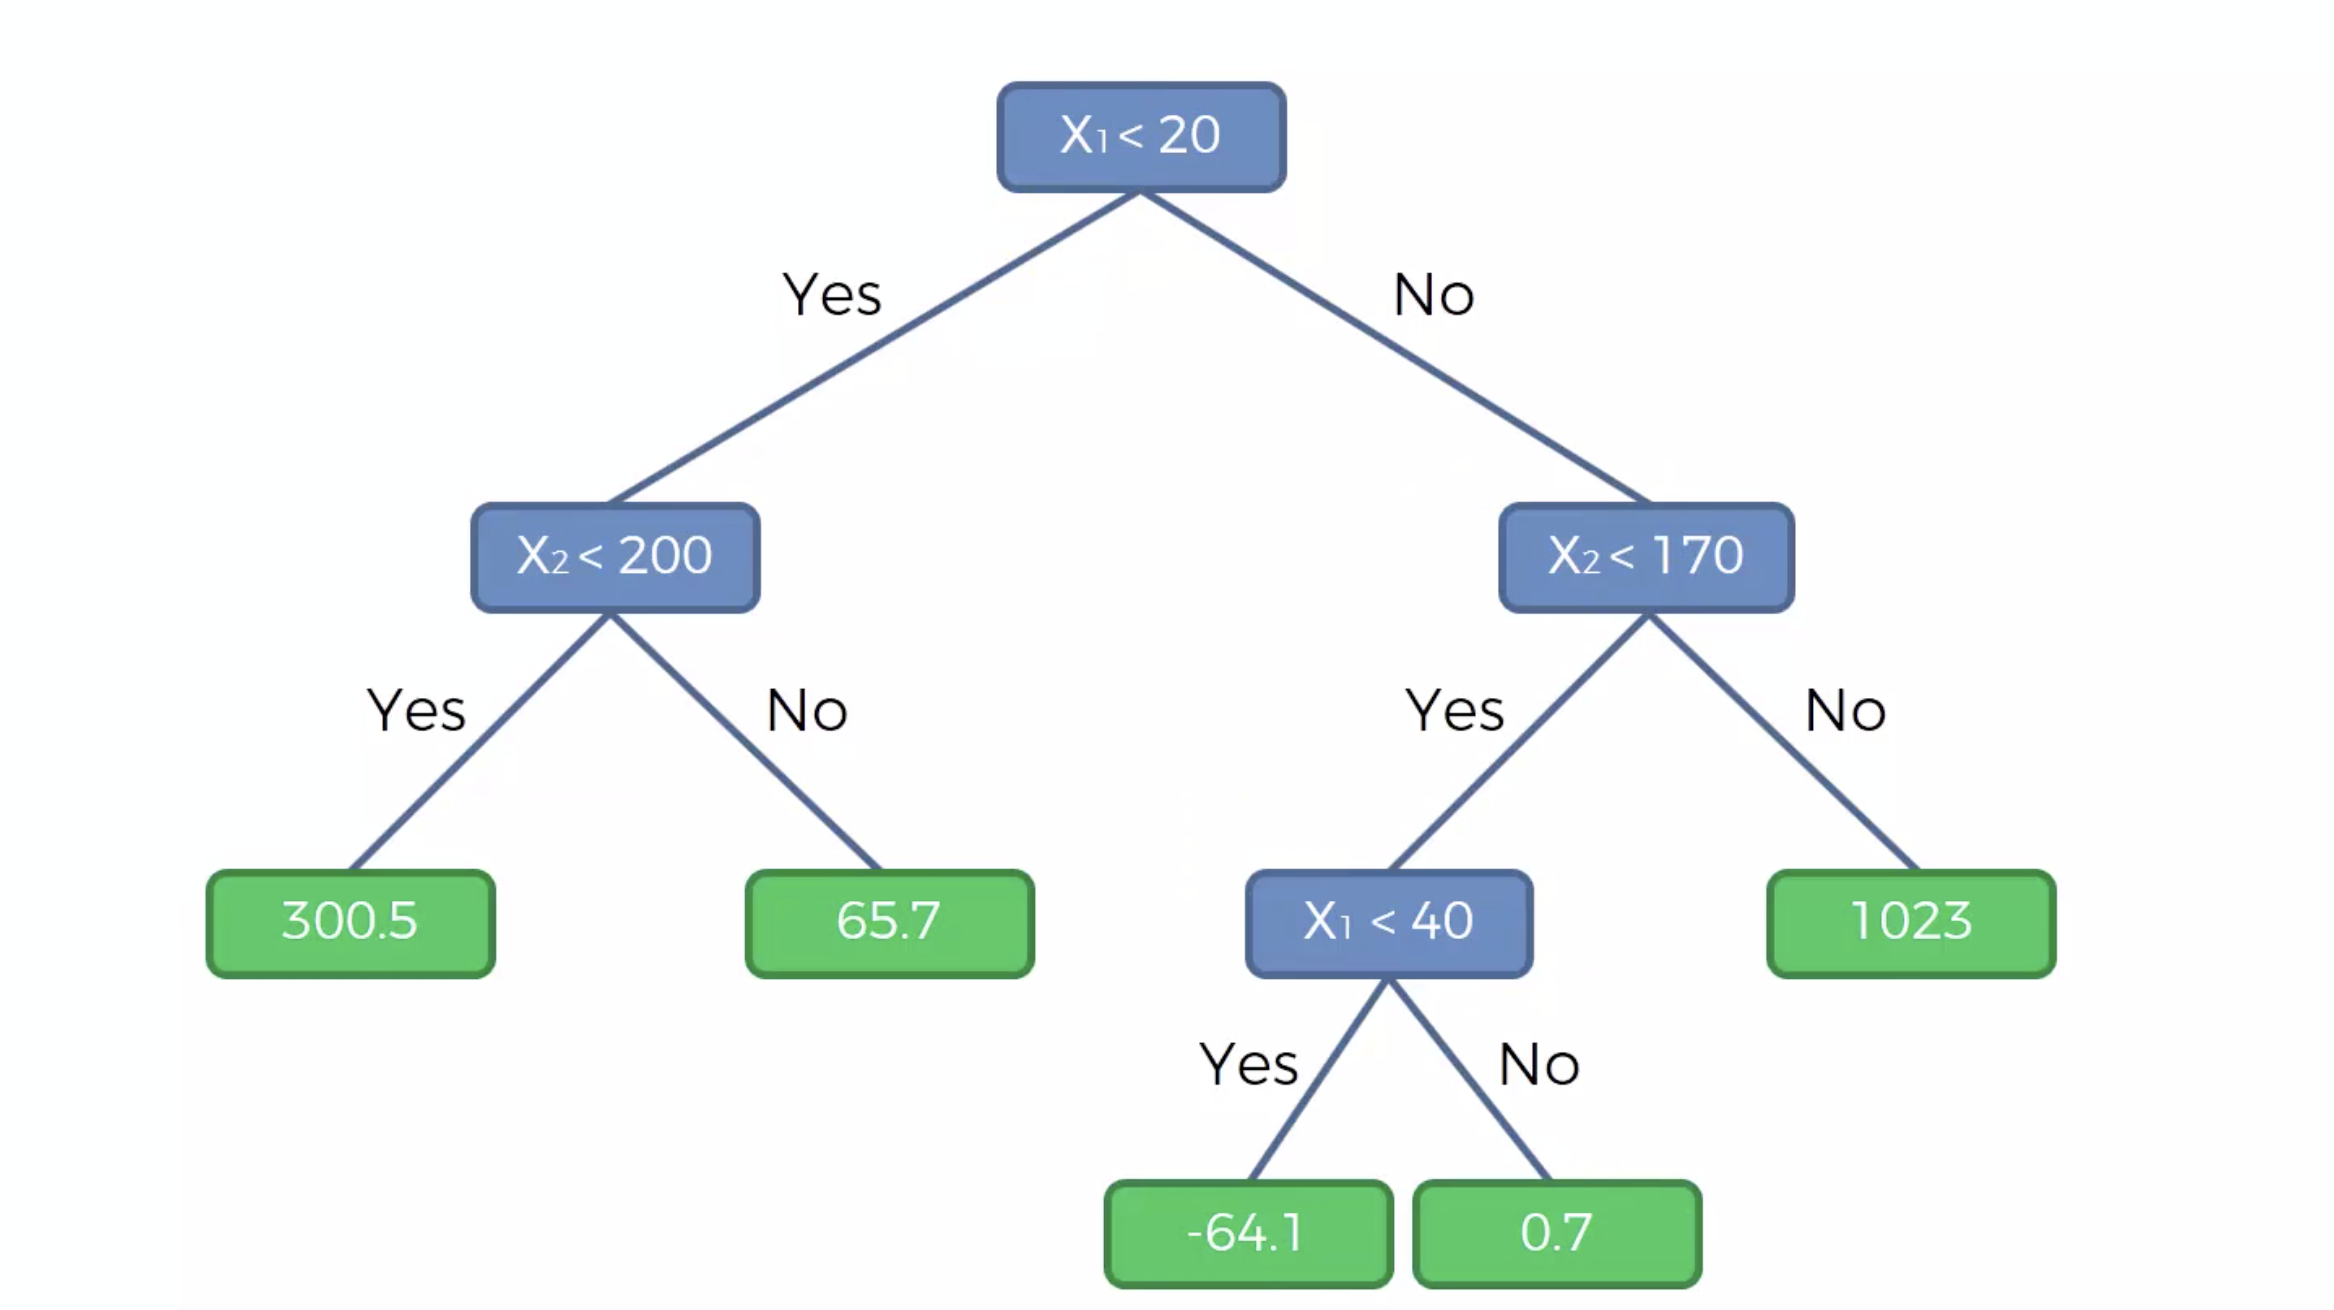
- 형성된 Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Text(0, 0.5, 'Salary')

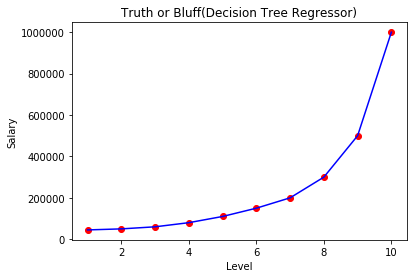

In [4]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or Bluff(Decision Tree Regressor)')
plt.xlabel('Level')
plt.ylabel('Salary')

In [7]:
regressor.predict([[6.8]])

array([200000.])

##### 이 경우 X의 feature가 하나이기 때문에 위의 예제와는 다르게 1차원적으로 하나의 x에 대해서만 interval을 나누게 된다. 이경우 10가지의 interval로 나뉘는데!
- 특정 X Interval(구역)을 대표하는 y값을 그 구역 내의 모든 X에 대한 y로 predict해야하지만 그렇지 않아보인다. 왜일까요?
- 일단 Split이 Feature 한개인 이 예제에서 1차원적으로 어떻게 나뉘는지 생각해 봅시다.

##### 이제까지 다뤄왔던 Regression 모델들은 continuous 모델이었지만, 이론적으로 이해될수 있듯이 DecisionTreeRegression은 nonlinear모델이다.

Text(0, 0.5, 'Salary')

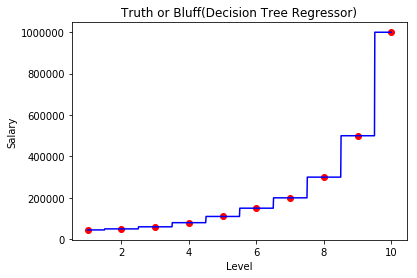

In [8]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.expand_dims(X_grid,axis=1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or Bluff(Decision Tree Regressor)')
plt.xlabel('Level')
plt.ylabel('Salary')

## 칠판 설명
##### Regression Tree 는 1D 데이터에서는 위 예제처럼 해상도를 키우지 않는 이상 잘 보이지 않으므로 feature 차원이 더 많을때 쓰는것이 낫다.
- 다른말로, 10개 레벨로 나뉘었을떄 interval은 그냥 10개일 뿐임. (이렇게되면 한 인터벌당 1개의 값밖에 안존재하기때문에 평균을 내는 의미가 없죠)